<a href="https://colab.research.google.com/github/Kinnaruo/MachineLearning/blob/main/UTS/Regresi/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
# 2. Load CSV file tanpa header
df = pd.read_csv("/content/RegresiUTSTelkom.csv", header=None)

# 3. Pisahkan target (kolom pertama) dan fitur
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

In [5]:
# 4. Hapus fitur dengan variansi rendah
selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X)

# 5. Seleksi fitur berdasarkan Mutual Information
# X_selected = SelectKBest(score_func=mutual_info_regression, k=30).fit_transform(X_var, y)

# Hapus fitur dengan variansi rendah
selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X)

# Seleksi korelasi tinggi dengan target
import pandas as pd
X_var_df = pd.DataFrame(X_var)
correlations = [np.corrcoef(X_var_df[col], y)[0,1] for col in X_var_df.columns]
selected_indices = [i for i, corr in enumerate(correlations) if abs(corr) > 0.05]

# Ambil hanya fitur yang berkorelasi
X_selected = X_var_df.iloc[:, selected_indices]

# 6. Split data train dan test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 7. Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression

📌 Linear Regression
MSE  : 97.39
RMSE : 9.87
R²   : 0.18


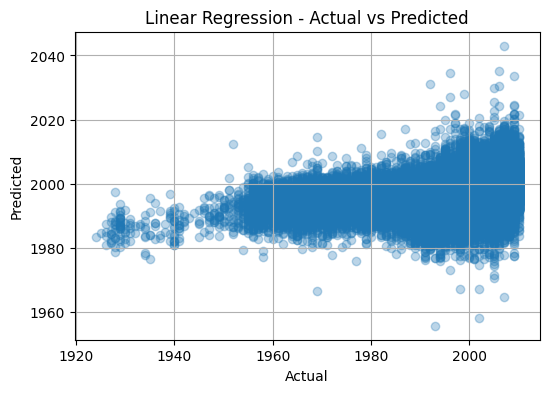

In [6]:
results = {}
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print("📌 Linear Regression")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")
results["Linear Regression"] = {"MSE": mse, "RMSE": rmse, "R2": r2}


plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_lr, alpha=0.3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression - Actual vs Predicted")
plt.grid(True)
plt.show()


Linear Regression
- **Deskripsi**: Model paling dasar yang mengasumsikan hubungan linier antara fitur dan target.
- **Kelebihan**:
  - Cepat dan mudah digunakan.
  - Hasilnya mudah diinterpretasikan.
- **Kekurangan**:
  - Tidak cocok untuk data dengan hubungan non-linear.
  - Sensitif terhadap outlier.
- **Cocok digunakan** saat hubungan antar fitur dan target bersifat linear dan interpretasi penting.

# Polynomial Regression

📌 Polynomial Regression
MSE  : 91.36
RMSE : 9.56
R²   : 0.23


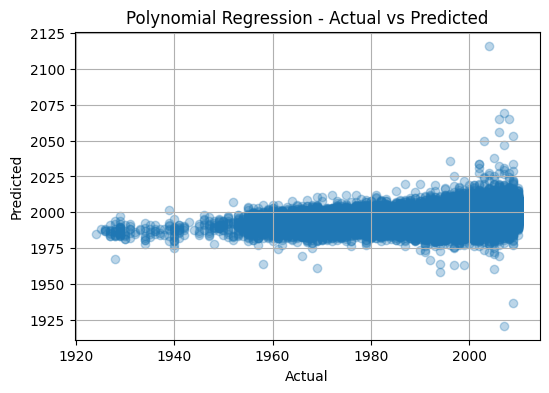

In [7]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_poly)

print("📌 Polynomial Regression")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")
results["Polynomial Regression"] = {"MSE": mse, "RMSE": rmse, "R2": r2}

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_poly, alpha=0.3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Polynomial Regression - Actual vs Predicted")
plt.grid(True)
plt.show()


Polynomial Regression
- **Deskripsi**: Perluasan dari Linear Regression yang menambahkan fitur polinomial (pangkat dua, tiga, dst).
- **Kelebihan**:
  - Bisa menangkap hubungan non-linear dalam data.
- **Kekurangan**:
  - Mudah overfitting jika derajat terlalu tinggi.
- **Cocok digunakan** saat model linear underfitting dan residual plot menunjukkan pola non-linear.

# Decision Tree

📌 Decision Tree Regressor
MSE  : 180.97
RMSE : 13.45
R²   : -0.52


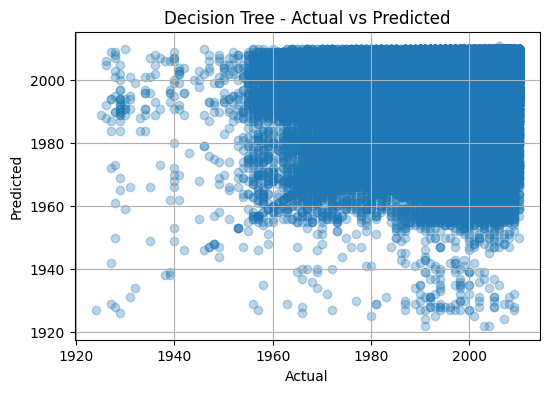

In [8]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dt)

print("📌 Decision Tree Regressor")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")
results["Decision Tree Regressor"] = {"MSE": mse, "RMSE": rmse, "R2": r2}

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_dt, alpha=0.3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree - Actual vs Predicted")
plt.grid(True)
plt.show()


Decision Tree Regressor
- **Deskripsi**: Model berbasis pohon yang mempartisi data berdasarkan fitur yang paling mengurangi error.
- **Kelebihan**:
  - Dapat menangani data non-linear.
  - Tidak memerlukan normalisasi fitur.
- **Kekurangan**:
  - Mudah overfitting.
  - Tidak stabil terhadap perubahan data kecil.
- **Cocok digunakan** untuk data kompleks dan non-linear.

# KNN

📌 KNN Regressor
MSE  : 94.90
RMSE : 9.74
R²   : 0.20


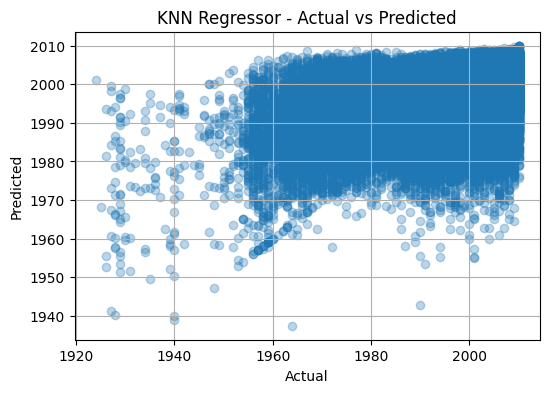

In [9]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_knn)

print("📌 KNN Regressor")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")
results["KNN Regressor"] = {"MSE": mse, "RMSE": rmse, "R2": r2}

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_knn, alpha=0.3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("KNN Regressor - Actual vs Predicted")
plt.grid(True)
plt.show()

K-Nearest Neighbors (KNN) Regressor
- **Deskripsi**: Prediksi nilai target berdasarkan rata-rata dari k tetangga terdekat.
- **Kelebihan**:
  - Sederhana, tidak mengasumsikan bentuk hubungan tertentu.
- **Kekurangan**:
  - Sensitif terhadap skala dan outlier.
  - Tidak efisien untuk dataset besar.
- **Cocok digunakan** untuk data kecil-menengah dengan struktur lokal yang kuat.

# Bagging Regressor

📌 Bagging Regressor
MSE  : 96.16
RMSE : 9.81
R²   : 0.19


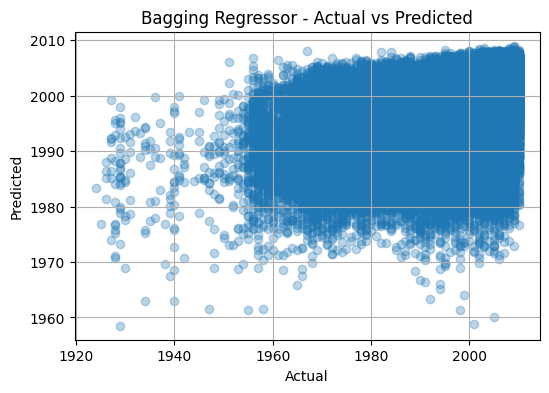

In [10]:
bagging_model = BaggingRegressor(random_state=42)
bagging_model.fit(X_train_scaled, y_train)
y_pred_bag = bagging_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_bag)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_bag)

print("📌 Bagging Regressor")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")
results["Bagging Regressor"] = {"MSE": mse, "RMSE": rmse, "R2": r2}

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_bag, alpha=0.3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Bagging Regressor - Actual vs Predicted")
plt.grid(True)
plt.show()


Bagging Regressor
- **Deskripsi**: Ensemble dari beberapa model (biasanya pohon keputusan) dilatih di subset acak dari data.
- **Kelebihan**:
  - Mengurangi variansi.
  - Lebih stabil dari model tunggal.
- **Kekurangan**:
  - Interpretasi hasil lebih sulit.
- **Cocok digunakan** untuk mengurangi overfitting dan meningkatkan stabilitas.


# AdaBoost Regressor

📌 AdaBoost Regressor
MSE  : 160.91
RMSE : 12.68
R²   : -0.35


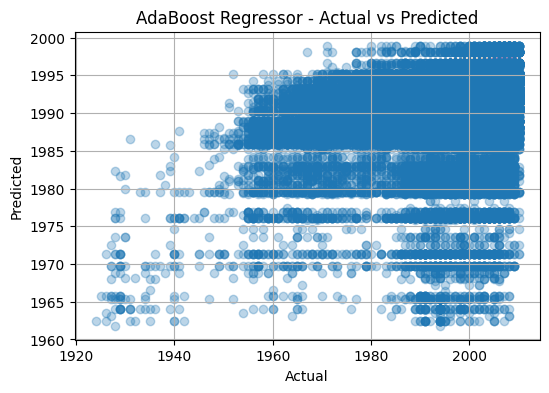

In [11]:
ada_model = AdaBoostRegressor(random_state=42)
ada_model.fit(X_train_scaled, y_train)
y_pred_ada = ada_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_ada)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ada)

print("📌 AdaBoost Regressor")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")
results["AdaBoost Regressor"] = {"MSE": mse, "RMSE": rmse, "R2": r2}

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_ada, alpha=0.3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("AdaBoost Regressor - Actual vs Predicted")
plt.grid(True)
plt.show()

AdaBoost Regressor
- **Deskripsi**: Ensemble learning dengan menekankan pembelajaran pada kesalahan dari model sebelumnya.
- **Kelebihan**:
  - Akurasi lebih tinggi dari model lemah.
- **Kekurangan**:
  - Sensitif terhadap outlier.
- **Cocok digunakan** saat model dasar seperti decision tree masih kurang optimal.

# Gradient Boosting Regressor

📌 Gradient Boosting Regressor
MSE  : 90.32
RMSE : 9.50
R²   : 0.24


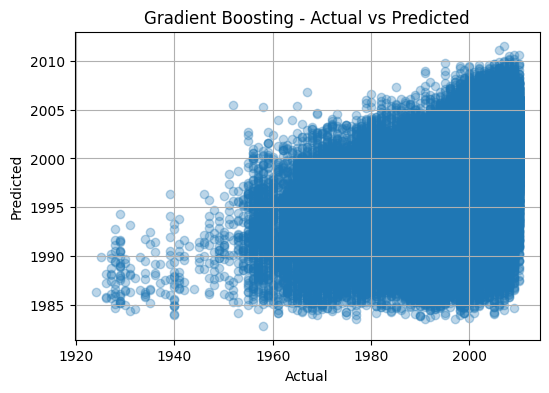

In [12]:
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train_scaled, y_train)
y_pred_gbr = gbr_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gbr)

print("📌 Gradient Boosting Regressor")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")
results["Gradient Boosting Regressor"] = {"MSE": mse, "RMSE": rmse, "R2": r2}

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_gbr, alpha=0.3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Gradient Boosting - Actual vs Predicted")
plt.grid(True)
plt.show()

Gradient Boosting Regressor
- **Deskripsi**: Membangun model secara bertahap untuk memperbaiki error model sebelumnya menggunakan teknik boosting.
- **Kelebihan**:
  - Akurasi tinggi dan mendukung regularisasi.
- **Kekurangan**:
  - Butuh waktu pelatihan lebih lama.
- **Cocok digunakan** untuk prediksi presisi tinggi dan dataset kompleks.


# Support Vector

In [ ]:
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svr)

print("📌 Support Vector Regressor")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")
results["Support Vector Regressor"] = {"MSE": mse, "RMSE": rmse, "R2": r2}

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_svr, alpha=0.3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("SVR - Actual vs Predicted")
plt.grid(True)
plt.show()

Support Vector Regressor (SVR)
- **Deskripsi**: Mencari fungsi prediksi dalam margin error tertentu, bisa menggunakan kernel untuk menangani non-linearitas.
- **Kelebihan**:
  - Kuat untuk data kecil dan non-linear.
- **Kekurangan**:
  - Lambat di dataset besar.
  - Perlu tuning parameter (kernel, epsilon, C).
- **Cocok digunakan** untuk dataset kecil-menengah yang kompleks.

In [13]:
# Summary table
import pandas as pd

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values("R2", ascending=False)

print("\n📊 Summary Tabel Evaluasi Model:")
print(results_df)


📊 Summary Tabel Evaluasi Model:
                                    MSE       RMSE        R2
Gradient Boosting Regressor   90.323204   9.503852  0.241077
Polynomial Regression         91.362002   9.558347  0.232349
KNN Regressor                 94.899047   9.741614  0.202630
Bagging Regressor             96.161179   9.806181  0.192025
Linear Regression             97.394354   9.868858  0.181663
AdaBoost Regressor           160.908557  12.684974 -0.352002
Decision Tree Regressor      180.965533  13.452343 -0.520527


Dari ke 7 model di atas, model terbaik dengan MSE terendah dan R2 Score tertinggi adalah Gradient Boosting